In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def annotate_ax(rects, ax_plot):
    for rect in rects:
        height = rect.get_height()
        ax_plot.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

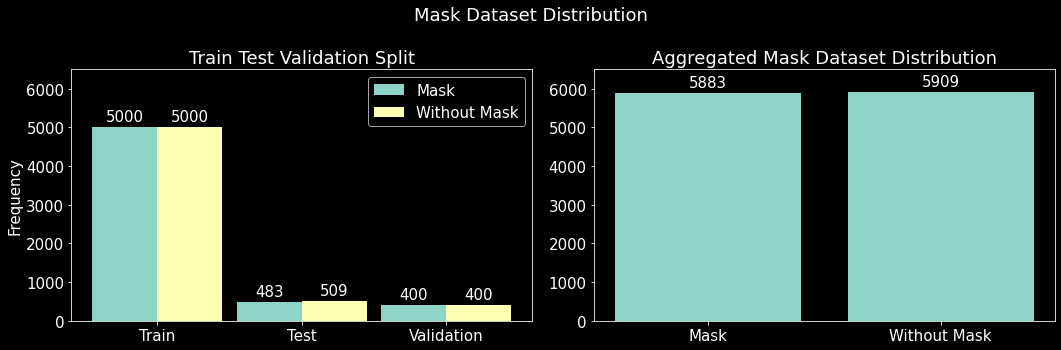

In [3]:
plt.style.use('dark_background')
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(1,2, figsize = (15,5))
plt.suptitle('Mask Dataset Distribution')

mask_num = 483 + 5000 + 400
without_mask_num = 509 + 5000 + 400

labels = ['Train', 'Test', 'Validation']
mask = [5000, 483, 400]
without_mask = [5000, 509, 400]

x = np.arange(len(labels))  # the label locations
width = 0.45  # the width of the bars

mask_rect = ax[0].bar(x - width/2, mask, width, label='Mask')
without_mask_rect = ax[0].bar(x + width/2, without_mask, width, label='Without Mask')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0].set_ylabel('Frequency')
ax[0].set_title('Train Test Validation Split')
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels)
ax[0].legend()
ax[0].set_ylim(0, 6500)


complete_mask_rects = ax[1].bar(['Mask', 'Without Mask'], [mask_num, without_mask_num])
ax[1].set_title('Aggregated Mask Dataset Distribution')
ax[1].set_ylim(0, 6500)


annotate_ax(mask_rect, ax[0])
annotate_ax(without_mask_rect, ax[0])
annotate_ax(complete_mask_rects, ax[1])

fig.tight_layout()
plt.savefig('../Images/MaskDistribution.png')
plt.show()

In [22]:
# df = pd.DataFrame([['Happy','Train',10],['Neutral','Train',12],['Angry','Train',13],['Happy','Test',8],
#                    ['Neutral','Test',10],['Angry','Test',12]],columns=['group','column','val'])

# df.pivot("column", "group", "val").plot(kind='bar')

# plt.show()

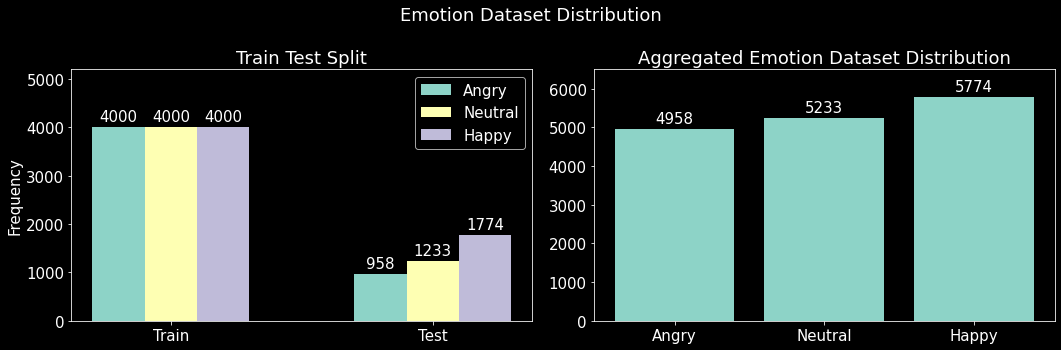

In [40]:
plt.style.use('dark_background')
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(1,2, figsize = (15,5))
plt.suptitle('Emotion Dataset Distribution')

angry_num = 4000 + 958
neutral_num = 4000 + 1233
happy_num = 4000 + 1774

labels = ['Train', 'Test']
angry = [4000, 958]
neutral = [4000,1233]
happy = [4000, 1774]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

r1 = np.arange(len(angry))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]


angry_rect = ax[0].bar(r1, angry, width, label='Angry')
neutral_rect = ax[0].bar(r2, neutral, width, label='Neutral')
happy_rect = ax[0].bar(r3, happy, width, label = 'Happy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0].set_ylabel('Frequency')
ax[0].set_title('Train Test Split')
ax[0].set_xticks([.2,1.2])
ax[0].set_xticklabels(labels)
ax[0].legend()
ax[0].set_ylim(0, 5200)


complete_emotion_rects = ax[1].bar(['Angry', 'Neutral', 'Happy'], [angry_num, neutral_num, happy_num])
ax[1].set_title('Aggregated Emotion Dataset Distribution')
ax[1].set_ylim(0, 6500)


annotate_ax(angry_rect, ax[0])
annotate_ax(neutral_rect, ax[0])
annotate_ax(happy_rect, ax[0])
annotate_ax(complete_emotion_rects, ax[1])


fig.tight_layout()
plt.savefig('../Images/EmotionDistribution.png')
plt.show()

In [11]:
img = cv2.imread('../Tests/Mask/Mask.jpg')
clone = img.copy()
classifier = cv2.CascadeClassifier(f'../ModelWeights/haarcascade_frontalface_default.xml')
bboxes = classifier.detectMultiScale(clone)[0]
x, y, width, height = bboxes[0], bboxes[1], bboxes[2], bboxes[3]
x2, y2 = x+ width, y+height

cv2.rectangle(clone, (x,y), (x2,y2), (0,255,0), 2)
cv2.imwrite('../Tests/Mask/Mask2.png', clone)
cv2.imshow('test', clone)
cv2.waitKey(0)
cv2.destroyAllWindows()

array([[[ 86,  82,  77],
        [ 87,  83,  78],
        [ 88,  84,  79],
        ...,
        [ 79,  77,  76],
        [ 79,  77,  76],
        [ 79,  77,  76]],

       [[ 87,  83,  78],
        [ 87,  83,  78],
        [ 87,  83,  78],
        ...,
        [ 81,  79,  78],
        [ 80,  78,  77],
        [ 80,  78,  77]],

       [[ 89,  85,  80],
        [ 88,  84,  79],
        [ 87,  83,  78],
        ...,
        [ 81,  79,  78],
        [ 80,  78,  77],
        [ 79,  77,  76]],

       ...,

       [[ 71,  71,  71],
        [ 70,  70,  70],
        [ 70,  70,  70],
        ...,
        [ 98, 107, 110],
        [ 98, 107, 110],
        [ 97, 106, 109]],

       [[ 71,  71,  71],
        [ 71,  71,  71],
        [ 70,  70,  70],
        ...,
        [ 98, 107, 110],
        [ 98, 107, 110],
        [ 98, 107, 110]],

       [[ 72,  72,  72],
        [ 71,  71,  71],
        [ 70,  70,  70],
        ...,
        [ 98, 107, 110],
        [ 98, 107, 110],
        [ 98, 107, 110]]

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import MobileNetV2
from keras.layers import AveragePooling2D, Dropout, Flatten, Dense, Input, GlobalAveragePooling2D, Conv2D, MaxPooling2D
from keras import regularizers
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.applications.mobilenet_v2 import preprocess_input
from sklearn.metrics import classification_report, confusion_matrix
from keras.applications.mobilenet_v2 import preprocess_input as mobile_preprocess
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import cv2
from keras.models import load_model
from PyFunctions import Viz
from PyFunctions import Functions as func
from keras.preprocessing import image as keras_image

Using plaidml.keras.backend backend.


In [2]:
dim = (224,224)

x_train, x_test, y_train, y_test, x_val, y_val = func.get_mask_splits(dim)

TRAIN Value Counts
1    5000
0    5000
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
TEST Value Counts
0    509
1    483
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
VALIDATION Value Counts
1    400
0    400
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [13]:
# original_img = cv2.imread('../FaceMaskDataset/Test/WithMask/219.png')
# original_img = cv2.resize(original_img, (224,224), interpolation = cv2.INTER_CUBIC)

# preprocessed_img = mobile_preprocess(original_img.copy())

# cv2.imshow('Preprocessed', preprocessed_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [16]:
# img = keras_image.load_img('../FaceMaskDataset/Test/WithMask/219.png', target_size = (224,224))
# clone_img = keras_image.load_img('../FaceMaskDataset/Test/WithMask/219.png', target_size = (224,224))

# img = keras_image.img_to_array(img)
# clone_img = keras_image.img_to_array(clone_img)

# preprocessed_img = mobile_preprocess(clone_img)

# stacked_preprocessed = np.hstack([clone_img, preprocessed_img])
# cv2.imshow('test', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

INFO:plaidml:Opening device "opencl_amd_ellesmere.0"


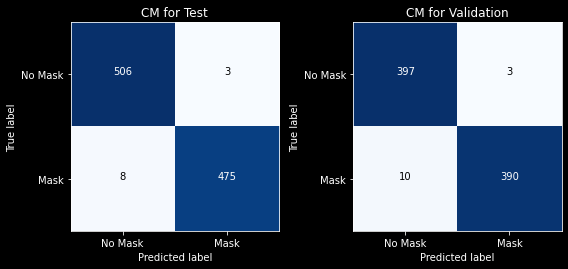

In [17]:
mobilenet = load_model('ModelWeights/Mobilenet_Masks.h5')
y_test_prob = [np.argmax(i) for i in mobilenet.predict(x_test)]
y_test_labels = [np.argmax(
    i) for i in y_test]
test_cnf = confusion_matrix(y_test_labels, y_test_prob)

val_prob = [np.argmax(i) for i in mobilenet.predict(x_val)]
val_labels = [np.argmax(i) for i in y_val]
val_cnf = confusion_matrix(val_labels, val_prob)

#this function creates a confusion matrix given the confusion matrixes of test and train
Viz.plot_model_cm(test_cnf, val_cnf, classes = ['No Mask', 'Mask'], theme = 'dark_background', model_type = 'mask', 
             path = 'Images/Mobilenet_CM.png')

In [18]:
val_predict = mobilenet.predict(x_val)
val_predict_new =[np.argmax(i) for i in val_predict]
y_val_new = [np.argmax(i) for i in y_val]

In [19]:
fp = [x_val[idx] for (idx,i) in enumerate(x_val) if val_predict_new[idx] != y_val_new[idx] and y_val_new[idx] ==0]
fn = [x_val[idx] for (idx,i) in enumerate(x_val) if val_predict_new[idx] != y_val_new[idx] and y_val_new[idx] ==1]

In [20]:
stacked_fp = np.hstack(fp)
cv2.imshow('Test', stacked_fp) 
cv2.waitKey(0)
cv2.destroyAllWindows() 


In [21]:
stacked_fn = np.hstack(fn)
cv2.imshow('Test', stacked_fn) 
cv2.waitKey(0)
cv2.destroyAllWindows() 

In [ ]:
assert False

In [22]:
model_name = 'normal'


x_train, x_test, y_train, y_test = func.get_emotion_splits(dim = (48,48), model_type = model_name, max_values = 4000, bw = True) 
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

TRAIN Value Count
2    4000
1    4000
0    3995
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
TEST Value Count
1    1774
2    1233
0     958
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
(11995, 48, 48, 3) (3965, 48, 48, 3)
(11995, 3) (3965, 3)


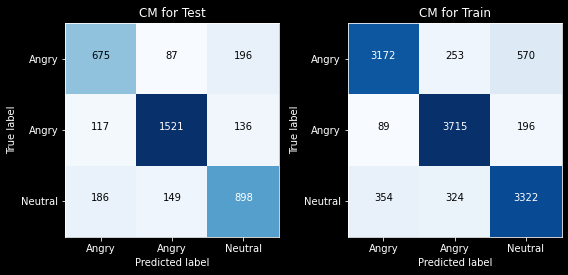

In [23]:
cnn = load_model('ModelWeights/Normal_Emotions.h5')
y_test_prob = [np.argmax(i) for i in cnn.predict(x_test)]
y_test_labels = [np.argmax(i) for i in y_test]
test_cnf = confusion_matrix(y_test_labels, y_test_prob)

train_prob = [np.argmax(i) for i in cnn.predict(x_train)]
train_labels = [np.argmax(i) for i in y_train]
train_cnf = confusion_matrix(train_labels, train_prob)

#this function creates a confusion matrix given the confusion matrixes of test and train
Viz.plot_model_cm(test_cnf, train_cnf, classes = ['Angry', 'Angry', 'Neutral'], theme = 'dark_background', 
                  model_type = 'emotion', path = 'Images/Normal_CM.png')

In [28]:
original_img = cv2.imread('../EmotionDataset/train/angry/Training_3908.jpg')
original_img = cv2.resize(original_img, (224,224), interpolation = cv2.INTER_CUBIC)

cv2.imshow('Preprocessed', original_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
img = keras_image.load_img('../EmotionDataset/train/angry/Training_3908.jpg', target_size = (224,224))
clone_img = keras_image.load_img('../EmotionDataset/train/angry/Training_3908.jpg', target_size = (224,224))

img = keras_image.img_to_array(img)
clone_img = keras_image.img_to_array(clone_img)

preprocessed_img = mobile_preprocess(clone_img)

stacked_preprocessed = np.hstack([clone_img, preprocessed_img])
cv2.imshow('test', clone_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [38]:
clone_img

array([[[0.27843142, 0.27843142, 0.27843142],
        [0.27843142, 0.27843142, 0.27843142],
        [0.27843142, 0.27843142, 0.27843142],
        ...,
        [0.05098045, 0.05098045, 0.05098045],
        [0.05098045, 0.05098045, 0.05098045],
        [0.05098045, 0.05098045, 0.05098045]],

       [[0.27843142, 0.27843142, 0.27843142],
        [0.27843142, 0.27843142, 0.27843142],
        [0.27843142, 0.27843142, 0.27843142],
        ...,
        [0.05098045, 0.05098045, 0.05098045],
        [0.05098045, 0.05098045, 0.05098045],
        [0.05098045, 0.05098045, 0.05098045]],

       [[0.27843142, 0.27843142, 0.27843142],
        [0.27843142, 0.27843142, 0.27843142],
        [0.27843142, 0.27843142, 0.27843142],
        ...,
        [0.05098045, 0.05098045, 0.05098045],
        [0.05098045, 0.05098045, 0.05098045],
        [0.05098045, 0.05098045, 0.05098045]],

       ...,

       [[0.06666672, 0.06666672, 0.06666672],
        [0.06666672, 0.06666672, 0.06666672],
        [0.06666672, 0

array([[[0.27843142, 0.27843142, 0.27843142],
        [0.27843142, 0.27843142, 0.27843142],
        [0.27843142, 0.27843142, 0.27843142],
        ...,
        [0.05098045, 0.05098045, 0.05098045],
        [0.05098045, 0.05098045, 0.05098045],
        [0.05098045, 0.05098045, 0.05098045]],

       [[0.27843142, 0.27843142, 0.27843142],
        [0.27843142, 0.27843142, 0.27843142],
        [0.27843142, 0.27843142, 0.27843142],
        ...,
        [0.05098045, 0.05098045, 0.05098045],
        [0.05098045, 0.05098045, 0.05098045],
        [0.05098045, 0.05098045, 0.05098045]],

       [[0.27843142, 0.27843142, 0.27843142],
        [0.27843142, 0.27843142, 0.27843142],
        [0.27843142, 0.27843142, 0.27843142],
        ...,
        [0.05098045, 0.05098045, 0.05098045],
        [0.05098045, 0.05098045, 0.05098045],
        [0.05098045, 0.05098045, 0.05098045]],

       ...,

       [[0.06666672, 0.06666672, 0.06666672],
        [0.06666672, 0.06666672, 0.06666672],
        [0.06666672, 0